## Swept Wing Divergence

In [46]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#We have considered the FEM analysis to be along the spanwise direction
#but we took a streamwise segment for the analysis

#Parameters
v = 1       #Free-Stream Speed
L = 17.6784
N = 3    #Number of FEM elements
sweep_angle = 34*np.pi/180
alpha_r = 0
le = L/N
le_bar = le/np.cos(sweep_angle)
g = 9.81
N_fac = 3
EI_tip = 2.0479e6
EI_root = 46.8516e6
GJ_tip = 1.7573e6
GJ_root = 29.2932e6
k_root = 0
k_tip = 0
chord_tip = 2.444
chord_root = 5.2857
e_tip = 0.3175
e_root = 0.68707
m_tip = 224.3316
m_root = 775.9280
ebar_prime = (e_tip - e_root) /L *np.cos(sweep_angle)
cbar_prime = (chord_tip - chord_root) /L *np.cos(sweep_angle)
mbar_prime = (m_tip - m_root) /L *np.cos(sweep_angle)
dbar_prime = 0.4*ebar_prime

def EI_func(y):
  return EI_root + (EI_tip  - EI_root) * (y/L)

def GJ_func(y):
  return GJ_root + (GJ_tip  - GJ_root) * (y/L)

def k_func(y):
  return k_root + (k_tip  - k_root) * (y/L)

def c_func(y):
  return chord_root + (chord_tip  - chord_root) * (y/L)

def e_func(y):
  return e_root + (e_tip  - e_root) * (y/L)

def CL_alpha_func(y):
  return 6 + 0*y

def Cm_AC_func(y):
  return -0.01 + 0*y

def m_func(y):
  return m_root + (m_tip  - m_root) * (y/L)

def d_func(y):
  return 0.4*e_func(y)

In [48]:
def stiffness_matrix(v, elem_num):

  #q = 0.5*1.225*(v**2)

  discrete_pts = 10
  y_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  EI = np.mean(EI_func(y_s))
  GJ = np.mean(GJ_func(y_s))
  k = np.mean(k_func(y_s))
  #e = np.mean(e_func(x_s))
  #c = np.mean(c_func(x_s))
  #CL_alpha = np.mean(CL_alpha_func(x_s))
  #Cm_AC =  np.mean(Cm_AC_func(x_s))
  #m = np.mean(m_func(x_s))
  #d = np.mean(d_func(x_s))
  #const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  K_elem = np.zeros((6,6))

  K_elem[:4,:4] = (EI/(le_bar**3))*np.array([
      [12, 6*le_bar, -12, 6*le_bar],
      [6*le_bar, 4*(le_bar**2), -6*le_bar, 2*(le_bar**2)],
      [-12, -6*le_bar, 12, -6*le_bar],
      [6*le_bar, 2*(le_bar**2), -6*le_bar, 4*(le_bar**2)]
  ])

  K_elem[:4, 4:6] = k/(le_bar)*np.array([
      [0, 0],
      [-1, 1],
      [0, 0],
      [1, -1]
  ])

  K_elem[4:6, :4] = np.transpose(K_elem[:4, 4:6])

  K_elem[4:6, 4:6] = (GJ/le_bar)*np.array([
      [1, -1],
      [1, -1]
  ])

  return K_elem

In [49]:
def bending_matrix(v, elem_num):

  q = 0.5*1.225*(v**2)

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  #EI = np.mean(EI_func(y_s))
  #GJ = np.mean(GJ_func(y_s))
  #k = np.mean(k_func(y_s))
  e = np.mean(e_func(x_s))
  c = np.mean(c_func(x_s))
  CL_alpha = np.mean(CL_alpha_func(x_s))
  #Cm_AC =  np.mean(Cm_AC_func(x_s))
  #m = np.mean(m_func(x_s))
  #d = np.mean(d_func(x_s))
  #const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  mat_1 = q*c*CL_alpha*le_bar*np.array([
      [7/20, 3/4],
      [le_bar/20, le_bar/30],
      [3/20, -7/20],
      [7*le_bar/30, -le_bar/20]
  ])

  mat_2 = q*e*c*CL_alpha*np.sin(sweep_angle)*np.array([
      [-1/2, 1/2],
      [-le_bar/12, le_bar/12],
      [-1/2, 1/2],
      [le_bar/12, -le_bar/12]
  ])

  return -(mat_1 + mat_2)*np.cos(sweep_angle)

In [50]:
def moment_matrix(v, elem_num):

  q = 0.5*1.225*(v**2)

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  #EI = np.mean(EI_func(y_s))
  #GJ = np.mean(GJ_func(y_s))
  #k = np.mean(k_func(y_s))
  e = np.mean(e_func(x_s))
  c = np.mean(c_func(x_s))
  CL_alpha = np.mean(CL_alpha_func(x_s))
  #Cm_AC =  np.mean(Cm_AC_func(x_s))
  #m = np.mean(m_func(x_s))
  #d = np.mean(d_func(x_s))
  #const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  mat = q*e*c*CL_alpha*le_bar*((np.cos(sweep_angle))**2)*np.array([
      [1/3, 1/6],
      [1/6, 1/3]
  ])

  return mat

In [51]:
def const_vector(v, elem_num):

  q = 0.5*1.225*(v**2)

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  #EI = np.mean(EI_func(y_s))
  #GJ = np.mean(GJ_func(y_s))
  #k = np.mean(k_func(y_s))
  e = np.mean(e_func(x_s))
  c = np.mean(c_func(x_s))
  CL_alpha = np.mean(CL_alpha_func(x_s))
  Cm_AC =  np.mean(Cm_AC_func(x_s))
  m = np.mean(m_func(x_s))
  d = np.mean(d_func(x_s))
  const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  from_bending = (q*c*CL_alpha*alpha_r - m*N*g + (q*ebar_prime*c*CL_alpha*alpha_r + q*e*cbar_prime*CL_alpha*alpha_r + 2*q*c*cbar_prime*Cm_AC - mbar_prime*N*g*d - m*N*g*dbar_prime)*np.sin(sweep_angle))*np.cos(sweep_angle)*np.array([
    -le_bar/2,
    le_bar**2/12,
    le_bar/2,
    -le_bar**2/12
  ])

  from_moment = -(q*e*c*CL_alpha*alpha_r + q*(c**2)*Cm_AC - m*N*g*d) *np.cos(sweep_angle)*np.array([
      0.5,
      0.5
  ])

  const_vector = np.zeros(6)
  const_vector[:4] = from_bending
  const_vector[4:6] = from_moment

  return const_vector

In [52]:
def global_matrices(v):

    q = 0.5*1.225*(v**2)
    le = L/N

    Global_stiffness = np.zeros((3*(N+1), 3*(N+1)))

    for i in range(N):

      K_stiff_for_FEM = stiffness_matrix(v, i)[:, [0, 1, 4, 2, 3, 5]]
      K_bending = bending_matrix(v, i)
      K_moment = moment_matrix(v, i)

      K_elem = K_stiff_for_FEM
      K_elem[:4, 2] += K_bending[:,0]
      K_elem[:4, 5] += K_bending[:,1]
      K_elem[4:6, 2] += K_moment[:,0]
      K_elem[4:6, 5] += K_moment[:,1]

      Global_stiffness[3*i:3*(i+2),3*i:3*(i+2)] += K_elem

    Global_const = np.zeros((3*(N+1),1))

    for i in range(N):

      Global_const[3*i:3*(i+2),0] += const_vector(v, i)

    return Global_stiffness, Global_const

In [53]:
def Model(v):

  Global_A, Global_b = global_matrices(v)

  #print(Global_A)

  #Imposing boundary conditions (theta at = 0)
  A_solve = Global_A[3:, 3:]
  b_solve = Global_b[3:, 0]

  solution = np.linalg.solve(A_solve, b_solve)
  h = np.zeros(N+1)
  h_prime = np.zeros(N+1)
  theta = np.zeros(N+1)

  h[1:] = solution[0::3]
  h_prime[1:] = solution[1::3]
  theta[1:] = solution[2::3]

  ybars = np.arange(N+1)*le_bar
  plt.plot(ybars, theta)

In [54]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

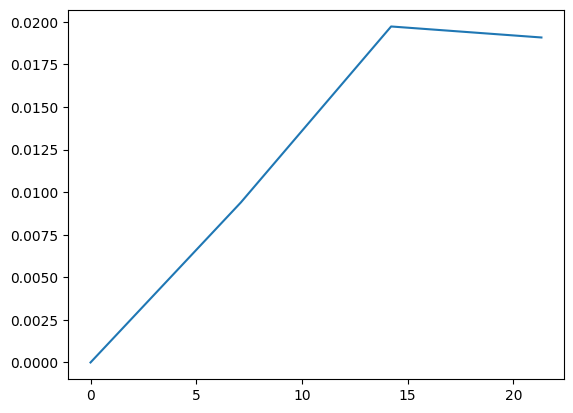

In [55]:
interact(Model, v=(0,10), N=fixed(N),L=fixed(L))

In [56]:
#For diveregence speed
#Solve for det = 0

def det_global(V):
    Global_A, Global_b = global_matrices(V)

    # Calculate the determinant of A
    det_A = np.linalg.det(Global_A)

    return det_A

#Implementing the bisection method

def divergence_speed_bisection(det, a, b, tol=1e-6, max_iter=1000):

    # Check if the signs of the function at the endpoints are opposite
    if det(a) * det(b) > 0:
        print("Error: The function has the same sign at both endpoints.")
        return None

    # Define the midpoint of the interval
    c = (a + b) / 2

    # Check if the interval is small enough or maximum iterations reached
    if abs(b - a) < tol or max_iter == 0:
        return c

    # Recursive case: update the interval and call the function recursively
    if det(c) * det(a) < 0:
        return divergence_speed_bisection(det, a, c, tol, max_iter - 1)
    else:
        return divergence_speed_bisection(det, c, b, tol, max_iter - 1)

In [58]:
divergence_speed_bisection(det_global, 0, 0.3, tol=1e-6, max_iter=1000)

Error: The function has the same sign at both endpoints.
